<a href="https://colab.research.google.com/github/a-belard/boston_house/blob/main/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Attribute Information:**

**CRIM**: Per capita crime rate by town
**ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
**INDUS**: Proportion of non-retail business acres per town
**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
**NOX**: Nitric Oxide concentration (parts per 10 million)
**RM**: The average number of rooms per dwelling
**AGE**: Proportion of owner-occupied units built before 1940
**DIS**: Weighted distances to five Boston employment centers
**RAD**: Index of accessibility to radial highways
**TAX**: Full-value property-tax rate per 10,000 dollars
**PTRATIO**: Pupil-teacher ratio by town
**LSTAT**: % lower status of the population
**MEDV**: Median value of owner-occupied homes in 1000 dollars

In [89]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from lightgbm import LGBMRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [91]:
df = pd.read_csv("/content/data/train.csv")

df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


**Prepare data, remove na values**

In [92]:
df = df.drop(columns=["ID"])
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

**Get Correlation values using seaborn heatmap**

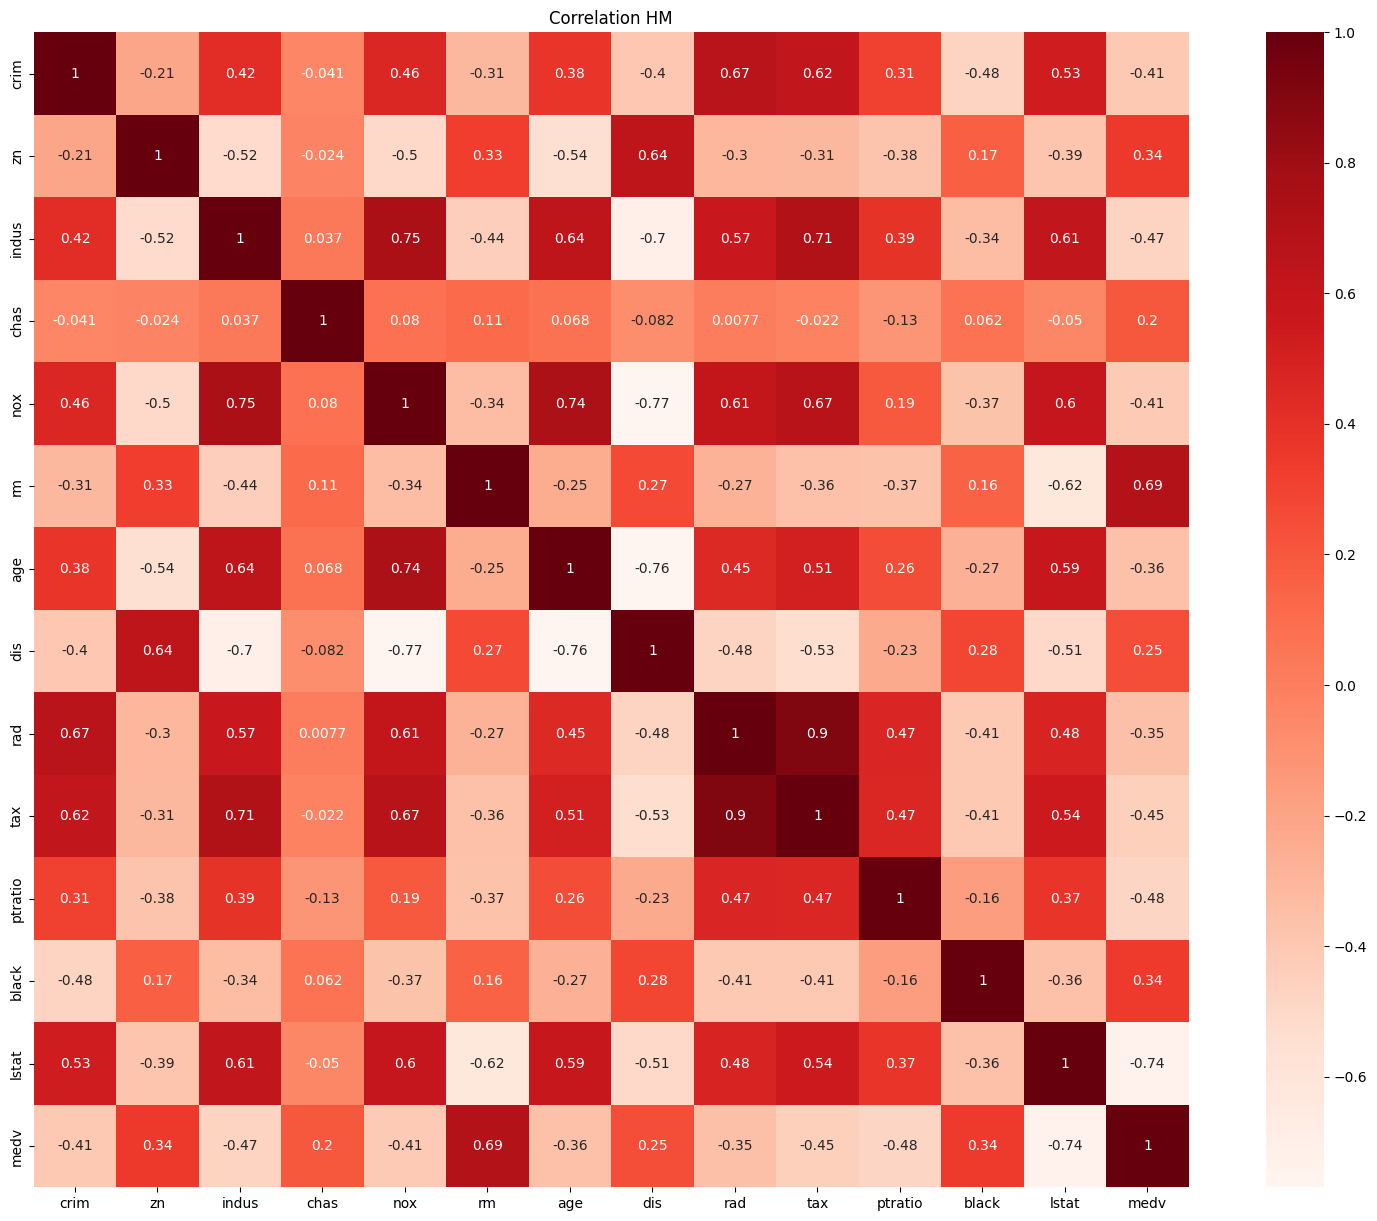

In [88]:
plt.rcParams['figure.figsize']=(20,15)
sns.heatmap(df.corr(),annot = True, cmap = 'Reds',square = True,cbar = True)
plt.title('Correlation HM')
plt.show()

**Assign the dependent and independent variables**

In [93]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

**Model Fitting**

Defining the Function for the ML algorithms using GridSearchCV Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, the R2 Score and the mean absolute error

In [66]:
def FitModel(x,y,algo_name,algorithm,GridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 99)
    grid = GridSearchCV(estimator = algorithm,param_grid = GridSearchParams,cv = cv,
                     scoring = 'r2',verbose = 0, n_jobs = -1)
    grid_result = grid.fit(x_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    pickle.dump(grid_result,open(algo_name,'wb'))
    print('Algorithm Name:\t',algo_name)
    print('Best Params:',best_params)
    print('R2 Score :', r2_score(y_test,pred))
    print("MAE :", mean_absolute_error(y_test, pred))

**Linear Regression***

In [94]:
param = {}
FitModel(x,y,'Linear Regression',LinearRegression(),param,cv=10)

Algorithm Name:	 Linear Regression
Best Params: {}
R2 Score : 0.7800838480762722
MAE : 3.212231317437874


**Decision Tree Regressor**

In [95]:
param = { "max_features":['auto','sqrt'],
          "max_depth":[int(x) for x in np.linspace(6, 45, num = 5)],
          "min_samples_leaf":[1,2,5,10],
          "min_samples_split":[2, 5, 10, 15, 100],
          "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5]}

FitModel(x,y,'Decision Tree',DecisionTreeRegressor(),param,cv=10)

Algorithm Name:	 Decision Tree
Best Params: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0}
R2 Score : 0.6429563221481153
MAE : 3.7211205875384983


**Random Forest Regressor**

In [96]:
param = {}
FitModel(x,y,'Random Forest',RandomForestRegressor(),param,cv=10)

Algorithm Name:	 Random Forest
Best Params: {}
R2 Score : 0.8826882898640248
MAE : 2.217194029850746


**LightGBM Regressor**

In [97]:
param = {}
FitModel(x,y,'LightGBM',LGBMRegressor(),param,cv=10)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 12
[LightGBM] [Info] Start training from score 22.444737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

**Loading the pickle file with the algorithm which gives highest r2 score percentage**

**GradientBoost Regressor**

In [78]:
param = {"learning_rate": [0.1, 0.2, 0.3, 0.4]}
FitModel(x,y,'GradientBoost',GradientBoostingRegressor(),param,cv=10)

Algorithm Name:	 GradientBoost
Best Params: {'learning_rate': 0.2}
R2 Score : 0.8771593659450408
MAE : 2.3358274568085946


In [98]:
model=pickle.load(open('Random Forest','rb'))

**Load the test data and predict the dependent variable using the loaded pickle file**

In [99]:
test = pd.read_csv("/content/data/test.csv")
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [100]:
test = test.drop(columns=['ID'])
pred1 = model.predict(test)

In [101]:
pred=pd.DataFrame(pred1,columns=['medv'])
pred_df = pd.read_csv("/content/data/test.csv")
pred_df = pd.concat([pred_df,pred],axis=1)
pred_df = pred_df[['ID','medv']]

In [102]:
pred_df.to_csv('Boston Predicted House Price.csv', index = False)